### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [61]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [69]:
df=pd.read_csv('vehicle.csv').dropna()

In [70]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [71]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### 2. Print/ Plot the dependent (categorical variable) - Class column

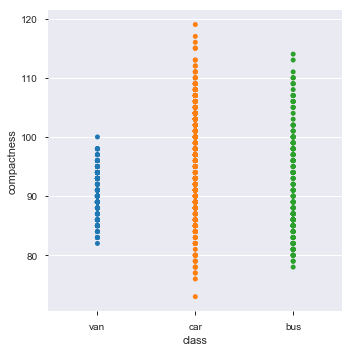

In [72]:
sns.catplot(x="class", y="compactness", jitter=False, data=df);

Since the variable is categorical, you can use value_counts function

### Check for any missing values in the data 

In [73]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [74]:
df.shape

(813, 19)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [76]:
X=df.drop(['class'],axis=1)
y=df[['class']]

In [77]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX = sc.fit_transform(X)

# statistics of scaled data
pd.DataFrame(scaledX).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02
mean,-2.425284e-16,-4.642999e-16,-2.351542e-16,3.665238e-16,-2.047016e-16,-1.349201e-16,3.714399e-16,-2.062038e-16,-2.651972e-16,-7.398756e-16,-3.031605e-17,-3.550529e-17,3.348422e-16,1.312159e-16,-1.693329e-17,9.845889e-17,-1.169490e-15,3.482249e-16
std,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00
min,-2.510344e+00,-1.921444e+00,-2.665447e+00,-1.937757e+00,-1.854258e+00,-1.411767e+00,-1.710835e+00,-1.922008e+00,-1.383740e+00,-2.062109e+00,-1.874279e+00,-1.452266e+00,-2.019423e+00,-1.793474e+00,-1.291420e+00,-1.422141e+00,-2.110457e+00,-1.992013e+00
25%,-8.089782e-01,-7.819133e-01,-7.635057e-01,-8.363933e-01,-5.992534e-01,-3.420870e-01,-6.824590e-01,-1.024408e+00,-6.060138e-01,-7.513773e-01,-6.863524e-01,-6.872619e-01,-7.815035e-01,-7.227236e-01,-8.847879e-01,-7.496057e-01,-8.096219e-01,-6.396066e-01
50%,-7.982157e-02,-1.307527e-01,-1.929234e-01,-6.246222e-02,-9.725132e-02,-1.281510e-01,-3.497491e-01,2.578765e-01,-2.171510e-01,-1.305046e-01,-3.010789e-01,-4.246486e-01,-3.875161e-02,-1.873484e-01,-7.152328e-02,-1.891593e-01,3.400092e-03,1.718371e-01
75%,7.708611e-01,6.831980e-01,1.011639e+00,7.710020e-01,4.047507e-01,2.997208e-01,8.903515e-01,6.425619e-01,9.494376e-01,7.663115e-01,9.189540e-01,8.427456e-01,7.349483e-01,3.480268e-01,5.384252e-01,7.075550e-01,6.538177e-01,7.127995e-01
max,3.079857e+00,2.311100e+00,1.899212e+00,4.878790e+00,9.566288e+00,9.926837e+00,2.916857e+00,2.565989e+00,3.282615e+00,2.766901e+00,4.225885e+00,3.309026e+00,2.901308e+00,8.378655e+00,3.181535e+00,3.173519e+00,2.767675e+00,2.065206e+00


In [78]:
scaledX

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [79]:
scaledX.shape

(813, 18)

In [80]:
cluster_errors= []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [81]:
# KMeans Clustring Algorithm
# Label, Intertia and Centroid
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(scaledX)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5740.555574
4,5,5185.817276
5,6,4705.949959
6,7,4350.686420
7,8,4089.445724
8,9,3867.484739


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

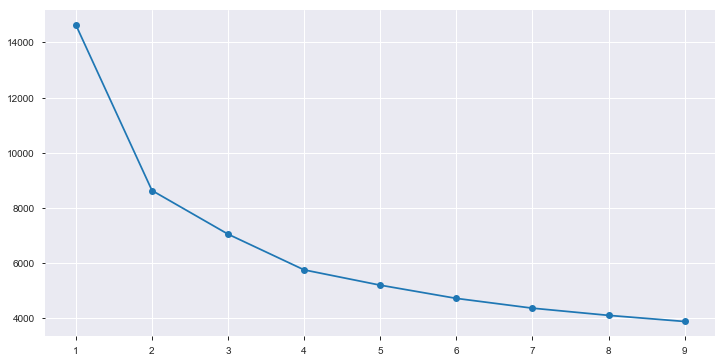

In [82]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [89]:
cluster = KMeans( n_clusters = 4, init='k-means++' )
cluster.fit(scaledX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [90]:
# Number of clusters

kmeans = KMeans(n_clusters=4)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

labels = kmeans.predict(X)

# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")

print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 97.96031746  46.5952381   93.16666667 198.28571429  64.02380952
    8.5952381  187.23015873  35.12698413  21.88095238 149.92063492
  207.4047619  529.33333333 183.03968254  68.26984127   6.04761905
   13.57142857 193.07936508 200.08730159]
 [104.41666667  53.40555556 102.88888889 201.16111111  61.82222222
    9.85555556 219.15        30.45555556  24.56666667 167.6
  231.47777778 712.17222222 215.31111111  72.92777778   7.33888889
   16.2        187.62222222 196.06666667]
 [ 87.84337349  38.29518072  63.92771084 133.25301205  57.24698795
    6.68674699 130.34939759  51.6686747   17.79518072 133.3373494
  151.81927711 252.05421687 140.93373494  72.53012048   6.3313253
   11.36746988 188.40963855 193.52409639]
 [ 89.2170088   42.76832845  75.74780059 158.83870968  63.12316716
    8.86803519 153.5659824   43.51612903  19.29912023 143.82404692
  176.39296188 350.95894428 165.55131965  73.58357771   5.95307918
   11.14956012 188.45747801 195.01466276]]


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [94]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns = list(scaledX) )

Hint: Use pd.Dataframe function 

In [95]:
prediction=cluster.predict(scaledX)
data_scaled = pd.DataFrame(scaledX)
data_scaled["GROUP"] = prediction

### Use kmeans.labels_ function to print out the labels of the classes

In [96]:
labels

array([3, 3, 1, 3, 3, 3, 2, 2, 2, 2, 3, 3, 0, 1, 2, 0, 1, 3, 2, 3, 3, 1,
       3, 2, 1, 0, 3, 3, 2, 2, 1, 3, 3, 3, 1, 3, 1, 2, 3, 3, 1, 3, 2, 3,
       3, 3, 2, 3, 1, 3, 1, 2, 0, 3, 1, 2, 0, 2, 2, 3, 0, 3, 1, 3, 0, 1,
       0, 2, 3, 0, 0, 3, 3, 1, 2, 3, 3, 1, 3, 2, 0, 2, 1, 3, 0, 3, 3, 1,
       3, 3, 0, 3, 3, 3, 2, 2, 0, 0, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 1, 0,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 0, 0, 3, 0, 2, 1, 3, 3, 2, 2, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 2, 0, 0, 3, 1, 3, 1, 3, 2, 3, 2, 0, 3, 2, 1, 1,
       3, 1, 3, 2, 1, 1, 3, 1, 3, 3, 0, 3, 2, 1, 2, 3, 2, 0, 0, 3, 3, 1,
       3, 0, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1, 0, 2, 3,
       1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 3, 2, 2, 3, 1, 2, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 3, 0, 1, 2,
       0, 2, 2, 0, 3, 3, 2, 2, 3, 0, 3, 1, 3, 3, 2, 1, 3, 0, 3, 3, 1, 3,
       3, 0, 2, 2, 3, 3, 2, 1, 3, 0, 2, 0, 0, 1, 3, 3, 2, 3, 3, 1, 1, 0,
       0, 3, 3, 0, 3, 2, 2, 0, 2, 1, 1, 3, 0, 3, 3,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [97]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

data = np.vstack((a,b,c))
X= pd.DataFrame(data)
print (X.shape)
X.head()

In [109]:
data = np.vstack((a,b,c))
X= pd.DataFrame(data)
print (X.shape)
X.head()

(250, 2)


,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

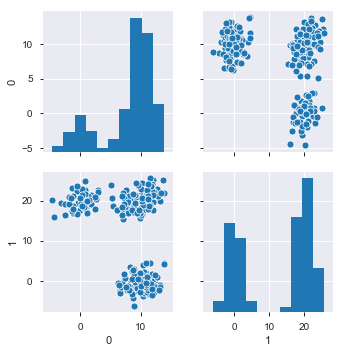

In [110]:
sns.pairplot(X)

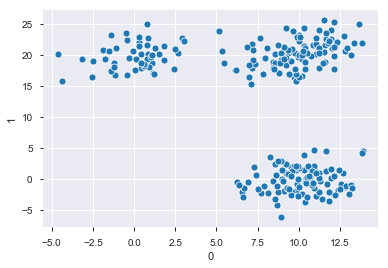

In [111]:
sns.scatterplot(x=X[0],y=X[1])

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [112]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [114]:
# Case 1: Ward Method
Z = linkage(X, 'ward',metric='euclidean')
c, coph_dists = cophenet(Z , pdist(X))
print("Ward",c)

Ward 0.9536963071171022


### 12. Plot the dendrogram for the consolidated dataframe

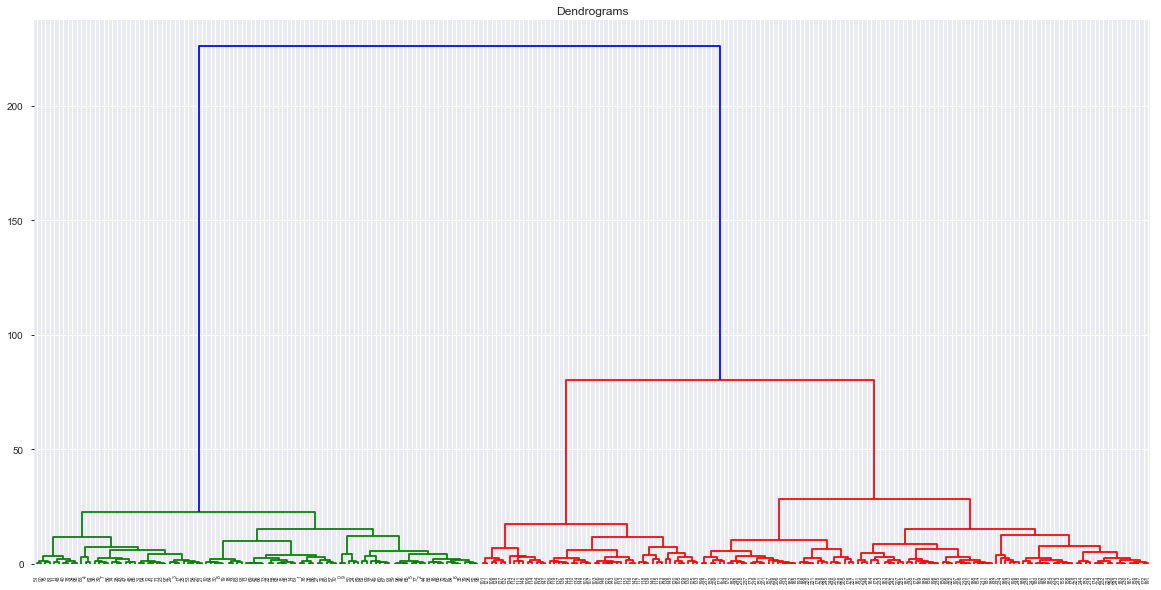

In [117]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

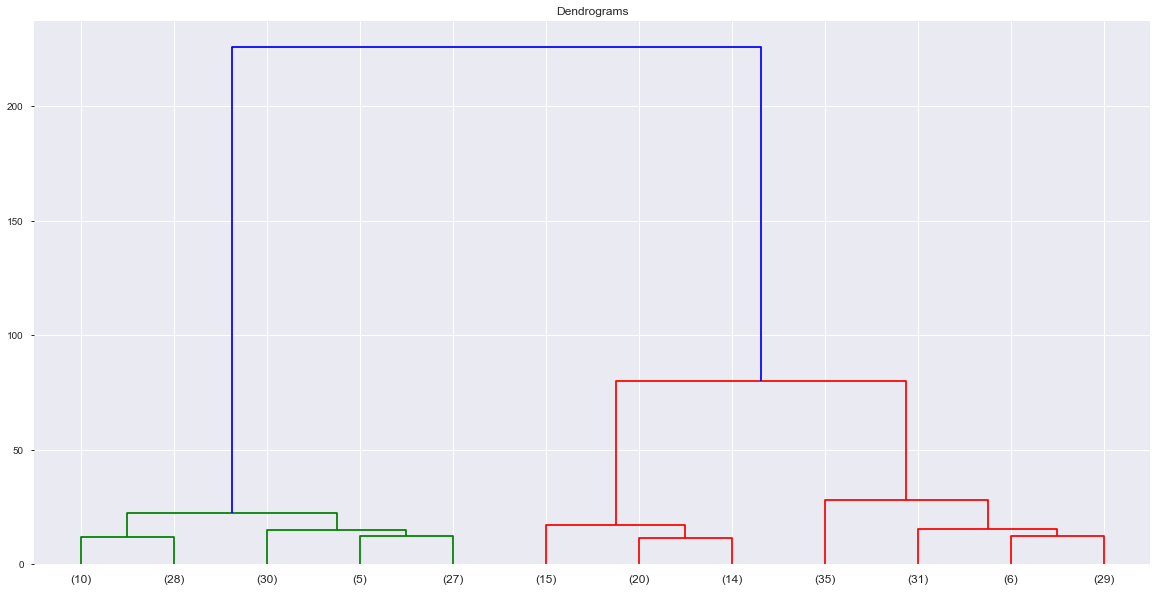

In [122]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'),p=12, truncate_mode='lastp')

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

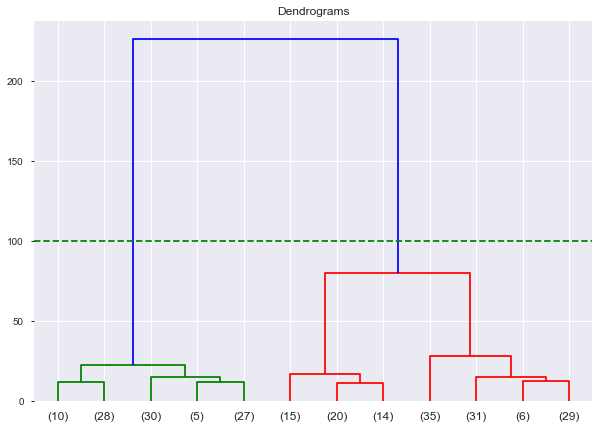

In [124]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'),p=12, truncate_mode='lastp')
plt.axhline(y=100, color='g', linestyle='--')

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 